In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
# Load the csv file that contains lease disclosures
df = pd.read_excel("E:/OLD LAPTOP Data - Lenovo/Downloads/NLP/trainingfeedback.xlsx")

In [3]:
# Display the first 5 rows
df.head()

,Feedback,Comments,Suggestions,Ideas
0,It gives me a lot of knowledge that I can use ...,NaN,Love the training,TMU Course was damn helpful
1,clearness and conciseness of the course how it...,NaN,Thank you boss,all good
2,"after taking this course, I choose to be ""Kid""...",None,All good,no comments


In [4]:
# Display the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Feedback     3 non-null      object
 1   Comments     1 non-null      object
 2   Suggestions  3 non-null      object
 3   Ideas        3 non-null      object
dtypes: object(4)
memory usage: 228.0+ bytes


In [5]:
# Only leave the LeaseFootnote column
df = df[["Feedback"]].dropna()
df.head()

,Feedback
0,It gives me a lot of knowledge that I can use ...
1,clearness and conciseness of the course how it...
2,"after taking this course, I choose to be ""Kid""..."


In [6]:
df['Feedback'][0]

'It gives me a lot of knowledge that I can use on my journey course'

In [7]:
# Replace \n with an empty space
df["Feedback"] = df["Feedback"].str.replace("\n", " ")
# View the first feedback again
df['Feedback'][0]

'It gives me a lot of knowledge that I can use on my journey course'

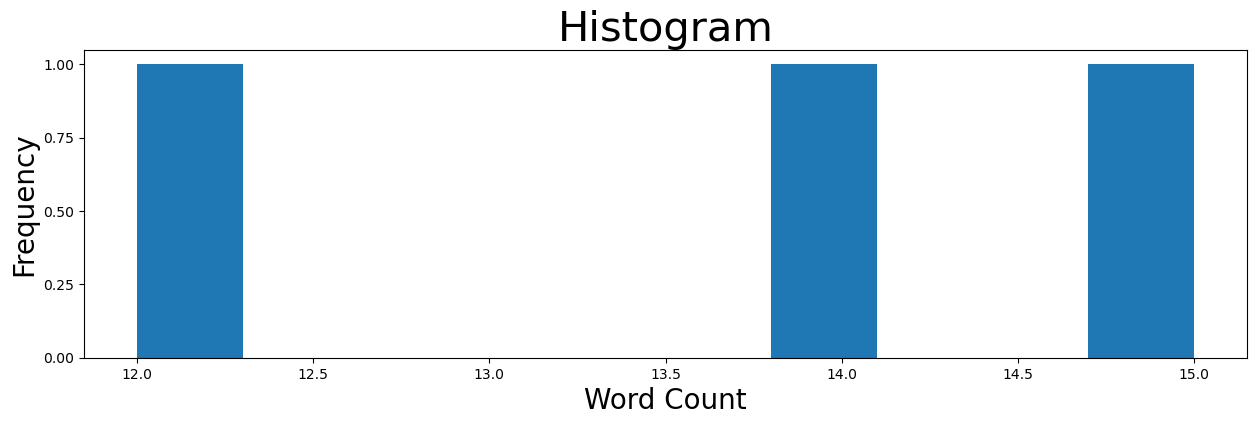

C:\Users\Admin\AppData\Local\Temp\ipykernel_23748\4289440091.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['word_count'],            # Plot


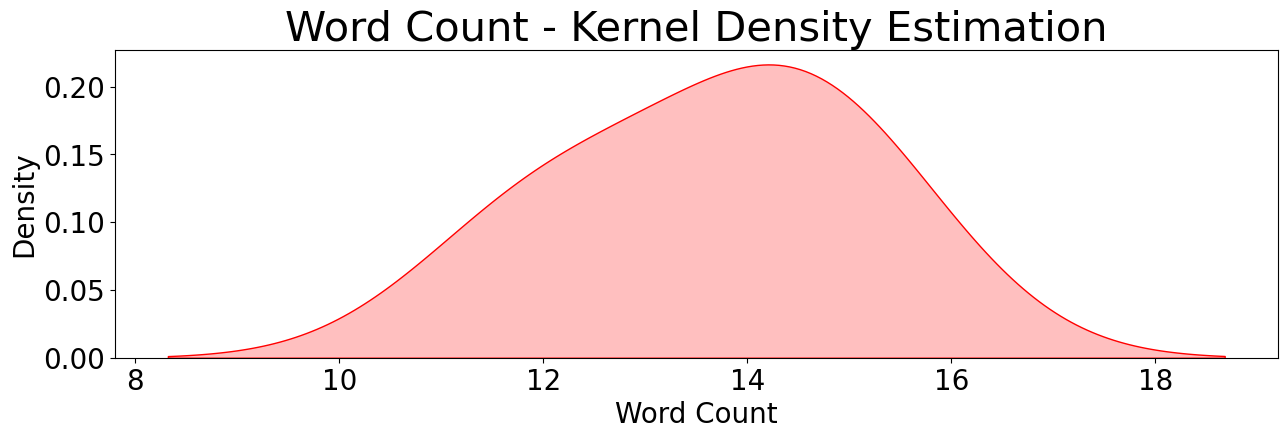

In [8]:
# Import library
import seaborn as sns
# Create a new column of word counts
df['word_count'] = df['Feedback'].str.split().str.len()
# Histogram
fig = plt.figure(figsize=(15, 4))             # Size
plt.hist(df['word_count'] )                   # Plot
plt.rcParams['font.size'] = 20                # Font size
plt.ylabel("Frequency", fontsize = 20)        # Y label
plt.xlabel("Word Count", fontsize = 20)       # X label
plt.title("Histogram", fontsize = 30)         # Title
plt.show()
# Kernel Density Plot
fig = plt.figure(figsize=(15, 4))             # Size
ax = sns.kdeplot(df['word_count'],            # Plot
         color = "Red", shade = True)
ax.set_ylabel("Density", fontsize = 20)       # Y label
ax.set_xlabel("Word Count", fontsize = 20)    # X label
plt.title(
    "Word Count - Kernel Density Estimation", 
    fontsize = 30)                            #title
plt.show()

In [9]:
# Descriptive stats
df['word_count'].describe()

count     3.000000
mean     13.666667
std       1.527525
min      12.000000
25%      13.000000
50%      14.000000
75%      14.500000
max      15.000000
Name: word_count, dtype: float64

In [10]:
# Import Libraries
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')   # Required for tokenization
nltk.download('wordnet') # Required for lemmatization
# Instantiate
lemmatizer = WordNetLemmatizer()
# Create our own stop words
stop_words = (                                        \
    "\n ’ the company and of for in to a or years l   \
    other were that ended we at with our included s   \
    firm follows under consolidated have these over   \
    include billion million december which an le from \
    certain le — million had show apple including     \
    as noncurrent current total three are on not is   \
    involving millions shows centers contains      "  \
             ).split()
# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits
# Print the exclusion list
print(exclist)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Create a Function
def clean_texts(text):
    """ Function to perform preprocessing """
    
    # Convert to lower cases
    text = text.lower()
    
    # Remove punctuations and numbers
    text = text.translate(str.maketrans("", "", exclist))
    
    # Replace certain words
    text = text.replace("leased", "lease")
    
    # Tokenization
    tokens = word_tokenize(text)
        
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens
    clean_text = " ".join(tokens)
    
    # Return the output
    return clean_text
# Apply the function to all disclosures
df['Feedback'] = df['Feedback'].apply(clean_texts)
# View the first 5 rows
df.head()

,Feedback,word_count
0,it give me lot knowledge i can use my journey ...,15
1,clearness conciseness course how it can help u...,14
2,after taking this course i choose be kid cours...,12


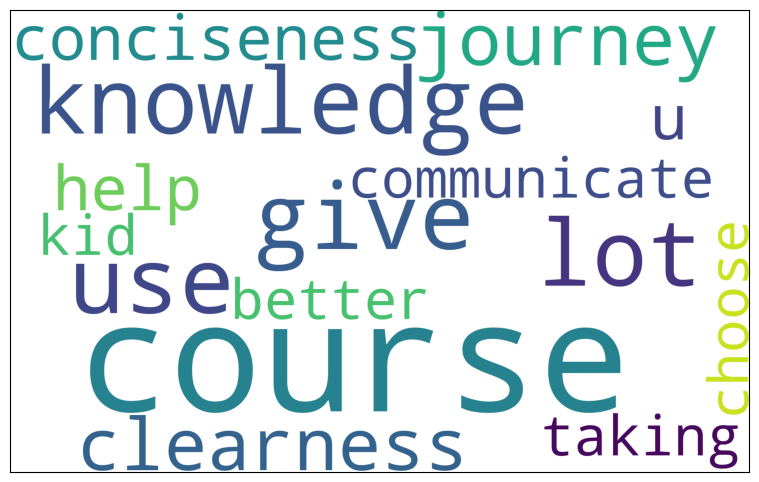

In [12]:
# Import library
from wordcloud import WordCloud
from collections import Counter
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
lease_wc = wc.generate(df['Feedback'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(lease_wc);

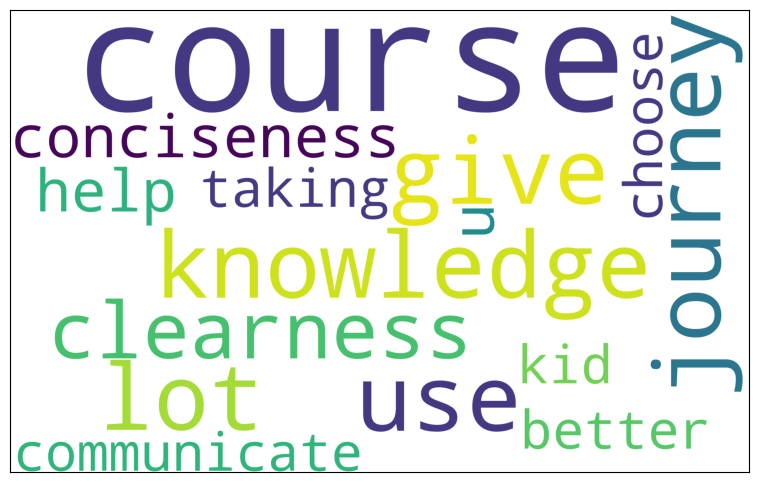

In [13]:
# Import library
from wordcloud import WordCloud
from collections import Counter
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
lease_wc = wc.generate(df['Feedback'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(lease_wc);

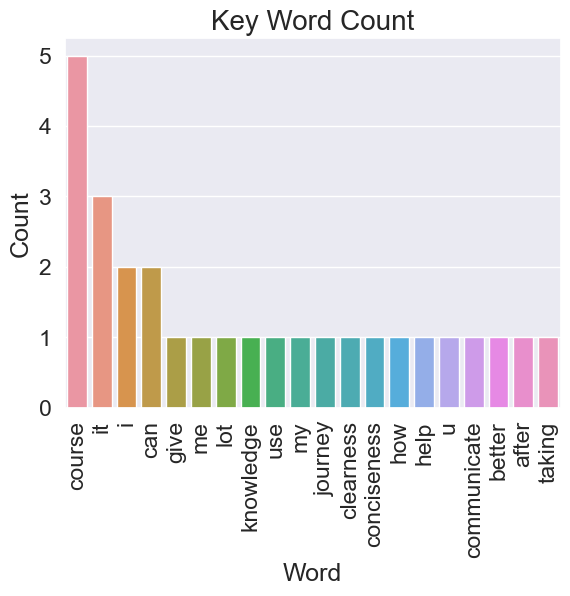

In [14]:
# Bar plot - Create a corpus of disclosures

corpus = []
for disclosures in df['Feedback'].tolist():
    for word in disclosures.split():
        corpus.append(word)
        
# Bar plot - Create a dataframe of the most common 30 words
common_words = pd.DataFrame(Counter(corpus).most_common(20))
common_words.columns = ('Word', 'Count')

# Plot a bar chart of the most common 20 words
sns.set(font_scale = 1.5)
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Key Word Count", fontsize = 20)
plt.show()

In [15]:
common_words

,Word,Count
0,course,5
1,it,3
2,i,2
3,can,2
4,give,1
5,me,1
6,lot,1
7,knowledge,1
8,use,1
9,my,1


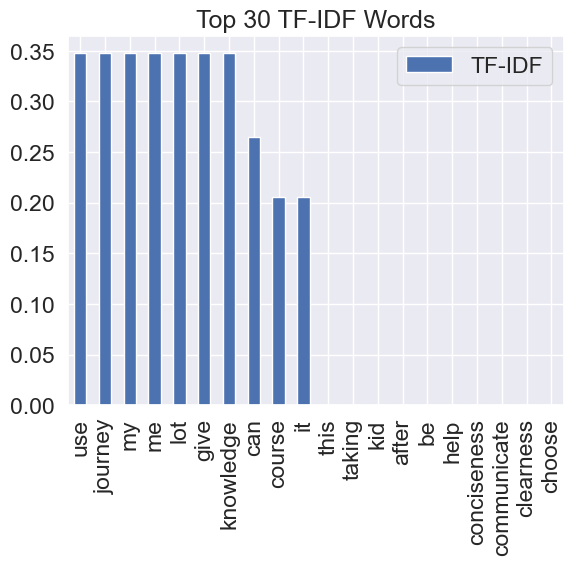

In [16]:
# Import library
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf = vectorizer.fit_transform(df['Feedback'])
# Create a dataframe of TFIDF
tfidf_df = pd.DataFrame(tfidf[0].T.todense(), 
                      index=vectorizer.get_feature_names_out(), 
                      columns=["TF-IDF"])
# Sort
tfidf_df = tfidf_df.sort_values('TF-IDF', ascending=False)
# Bar Plot
tfidf_df[:20].plot.bar(title="Top 30 TF-IDF Words");

In [17]:
!pip install keybert

In [18]:
# Import library
from keybert import KeyBERT
# Instantiate
kw_model = KeyBERT()
# Extract keywords
keywords = df['Feedback'].apply(kw_model.extract_keywords)
# Print the keywords in the first two disclosures
print(keywords[0])
print(keywords[1])

[('journey', 0.4881), ('knowledge', 0.3906), ('use', 0.2887), ('course', 0.2164), ('lot', 0.1859)]
[('clearness', 0.5557), ('communicate', 0.5467), ('conciseness', 0.4907), ('course', 0.2597), ('help', 0.1762)]


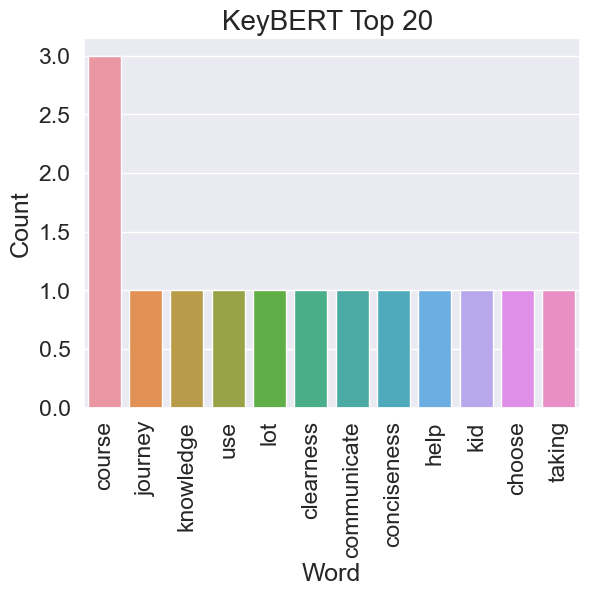

In [21]:
# Extract keywords from the KeyBERT output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("KeyBERT Top 20 ", fontsize = 20)
plt.show()

In [22]:
common_words

,Word,Count
0,course,3
1,journey,1
2,knowledge,1
3,use,1
4,lot,1
5,clearness,1
6,communicate,1
7,conciseness,1
8,help,1
9,kid,1


In [21]:
!pip install yake

     ---------------------------------------- 0.0/60.2 kB ? eta -:--:--
     --------------------------- ------------ 41.0/60.2 kB 1.9 MB/s eta 0:00:01
     --------------------------- ------------ 41.0/60.2 kB 1.9 MB/s eta 0:00:01
     --------------------------- ------------ 41.0/60.2 kB 1.9 MB/s eta 0:00:01
     --------------------------- ------------ 41.0/60.2 kB 1.9 MB/s eta 0:00:01
     --------------------------- ------------ 41.0/60.2 kB 1.9 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.2 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.2 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.2 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.2 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.2 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.2 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 60.2

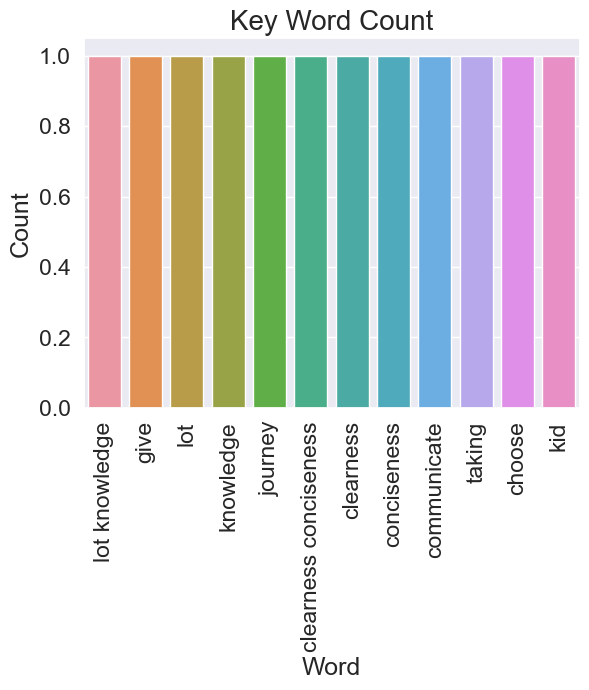

In [23]:
# Import library
import yake
# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=2)
# Extract keywords and scores from each disclosure
keywords = df['Feedback'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))
        
# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
# Plot a bar chart of the most common 20 words
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Key Word Count", fontsize = 20)
plt.show()